In [48]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix


raw_data = pd.read_csv("car_crashes.csv")
raw_data['Date'] = pd.to_datetime(raw_data.Date)
raw_data= raw_data.sort_values(by= "Date", ascending=True)
print(raw_data.shape)
raw_data.head(6)

(895916, 18)


,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
87712,2014,Fatal Accident,1:24,2014-01-01,Wednesday,Y,Dark-Road Unlighted,GREENVILLE,OTHER,ORANGE,Straight and Level,Clear,No Passing Zone,Dry,6 83012073,Not Applicable,"Tree, Collision With Fixed Object",1
194564,2014,Property Damage & Injury Accident,1:25,2014-01-01,Wednesday,Y,Dark-Road Unlighted,DOVER,OTHER,DUTCHESS,Curve at Hill Crest,Clear,No Passing Zone,Wet,NaN,Not Applicable,"Tree, Collision With Fixed Object",1
237937,2014,Property Damage & Injury Accident,0:50,2014-01-01,Wednesday,Y,Dark-Road Lighted,QUEENS,REAR END,QUEENS,Straight and Level,Clear,Traffic Signal,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
92824,2014,Property Damage & Injury Accident,3:11,2014-01-01,Wednesday,Y,Dark-Road Lighted,ROCHESTER,RIGHT ANGLE,MONROE,Straight and Level,Clear,Traffic Signal,Dry,31 43032017,Not Applicable,"Other Motor Vehicle, Collision With",2
159622,2014,Property Damage & Injury Accident,21:57,2014-01-01,Wednesday,Y,Dark-Road Lighted,SARATOGA SPRINGS,LEFT TURN (3),SARATOGA,Straight and Level,Clear,Traffic Signal,Dry,29 15032009,Not Applicable,"Other Motor Vehicle, Collision With",2
115960,2014,Property Damage Accident,5:15,2014-01-01,Wednesday,Y,Dark-Road Lighted,ISLANDIA,Unknown,SUFFOLK,Straight and Level,Clear,Traffic Signal,Dry,454 07011068,Not Applicable,"Other Motor Vehicle, Collision With",2


In [49]:
raw_data.describe()

,Year,Number of Vehicles Involved
count,895916.000000,895916.000000
mean,2015.002741,1.776373
std,0.819278,0.638717
min,2014.000000,1.000000
25%,2014.000000,1.000000
50%,2015.000000,2.000000
75%,2016.000000,2.000000
max,2016.000000,50.000000


In [50]:
raw_data.groupby('Number of Vehicles Involved').count()['Weather Conditions']

Number of Vehicles Involved
1     280500
2     551290
3      52195
4       9267
5       1915
6        492
7        137
8         47
9         22
10        22
11         9
12         5
13         2
14         2
15         2
16         2
18         1
19         2
26         1
30         1
31         1
50         1
Name: Weather Conditions, dtype: int64

<AxesSubplot:xlabel='Number of Vehicles Involved'>

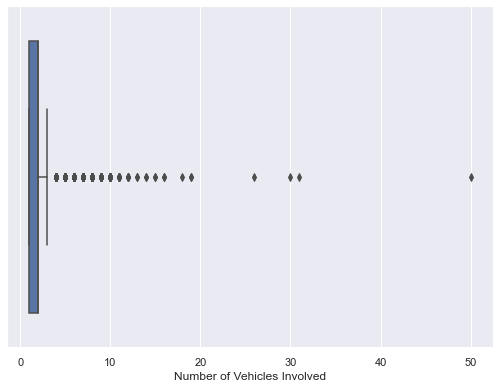

In [51]:
sns.boxplot(x=raw_data['Number of Vehicles Involved'])

<AxesSubplot:xlabel='Number of Vehicles Involved'>

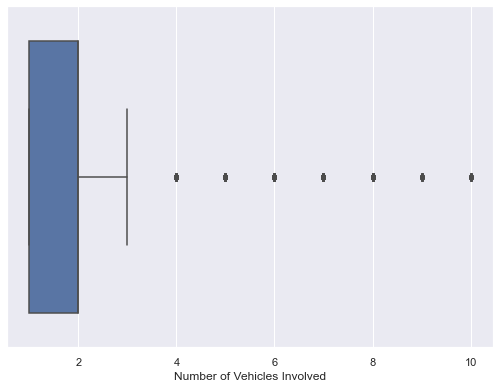

In [52]:
rm_data = raw_data.drop(raw_data[raw_data['Number of Vehicles Involved'] > 10].index, inplace = False)
sns.boxplot(x=rm_data['Number of Vehicles Involved'])

In [53]:
rm_data.groupby('Number of Vehicles Involved').count()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor
Number of Vehicles Involved,,,,,,,,,,,,,,,,,
1,280500,280500,280500,280500,280500,280500,280500,276122,280500,280500,280500,280500,280500,280500,98586,280500,280500
2,551290,551290,551290,551290,551290,551290,551290,544141,551290,551290,551290,551290,551290,551290,187901,551290,551290
3,52195,52195,52195,52195,52195,52195,52195,51811,52195,52195,52195,52195,52195,52195,22351,52195,52195
4,9267,9267,9267,9267,9267,9267,9267,9222,9267,9267,9267,9267,9267,9267,3848,9267,9267
5,1915,1915,1915,1915,1915,1915,1915,1900,1915,1915,1915,1915,1915,1915,673,1915,1915
6,492,492,492,492,492,492,492,489,492,492,492,492,492,492,154,492,492
7,137,137,137,137,137,137,137,135,137,137,137,137,137,137,42,137,137
8,47,47,47,47,47,47,47,47,47,47,47,47,47,47,15,47,47
9,22,22,22,22,22,22,22,22,22,22,22,22,22,22,7,22,22


In [54]:
rm_data.isnull().sum()

Year                                  0
Crash Descriptor                      0
Time                                  0
Date                                  0
Day of Week                           0
Police Report                         0
Lighting Conditions                   0
Municipality                      11977
Collision Type Descriptor             0
County Name                           0
Road Descriptor                       0
Weather Conditions                    0
Traffic Control Device                0
Road Surface Conditions               0
DOT Reference Marker Location    582302
Pedestrian Bicyclist Action           0
Event Descriptor                      0
Number of Vehicles Involved           0
dtype: int64

In [55]:
df = rm_data.drop(['Day of Week','Police Report','DOT Reference Marker Location','County Name','Municipality'], axis=1)
df.head(5)

,Year,Crash Descriptor,Time,Date,Lighting Conditions,Collision Type Descriptor,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
87712,2014,Fatal Accident,1:24,2014-01-01,Dark-Road Unlighted,OTHER,Straight and Level,Clear,No Passing Zone,Dry,Not Applicable,"Tree, Collision With Fixed Object",1
194564,2014,Property Damage & Injury Accident,1:25,2014-01-01,Dark-Road Unlighted,OTHER,Curve at Hill Crest,Clear,No Passing Zone,Wet,Not Applicable,"Tree, Collision With Fixed Object",1
237937,2014,Property Damage & Injury Accident,0:50,2014-01-01,Dark-Road Lighted,REAR END,Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2
92824,2014,Property Damage & Injury Accident,3:11,2014-01-01,Dark-Road Lighted,RIGHT ANGLE,Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2
159622,2014,Property Damage & Injury Accident,21:57,2014-01-01,Dark-Road Lighted,LEFT TURN (3),Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2


In [56]:
raw_data.dtypes

Year                                      int64
Crash Descriptor                         object
Time                                     object
Date                             datetime64[ns]
Day of Week                              object
Police Report                            object
Lighting Conditions                      object
Municipality                             object
Collision Type Descriptor                object
County Name                              object
Road Descriptor                          object
Weather Conditions                       object
Traffic Control Device                   object
Road Surface Conditions                  object
DOT Reference Marker Location            object
Pedestrian Bicyclist Action              object
Event Descriptor                         object
Number of Vehicles Involved               int64
dtype: object

In [57]:
raw_data.count()

Year                             895916
Crash Descriptor                 895916
Time                             895916
Date                             895916
Day of Week                      895916
Police Report                    895916
Lighting Conditions              895916
Municipality                     883939
Collision Type Descriptor        895916
County Name                      895916
Road Descriptor                  895916
Weather Conditions               895916
Traffic Control Device           895916
Road Surface Conditions          895916
DOT Reference Marker Location    313601
Pedestrian Bicyclist Action      895916
Event Descriptor                 895916
Number of Vehicles Involved      895916
dtype: int64

In [58]:
df.dtypes

Year                                    int64
Crash Descriptor                       object
Time                                   object
Date                           datetime64[ns]
Lighting Conditions                    object
Collision Type Descriptor              object
Road Descriptor                        object
Weather Conditions                     object
Traffic Control Device                 object
Road Surface Conditions                object
Pedestrian Bicyclist Action            object
Event Descriptor                       object
Number of Vehicles Involved             int64
dtype: object

In [59]:
df.count() 

Year                           895887
Crash Descriptor               895887
Time                           895887
Date                           895887
Lighting Conditions            895887
Collision Type Descriptor      895887
Road Descriptor                895887
Weather Conditions             895887
Traffic Control Device         895887
Road Surface Conditions        895887
Pedestrian Bicyclist Action    895887
Event Descriptor               895887
Number of Vehicles Involved    895887
dtype: int64

In [61]:
df[df.duplicated()].shape

(13863, 13)

In [62]:
df = df.drop_duplicates()
df.shape

(882024, 13)

In [16]:
df.count() 

Year                           893999
Crash Descriptor               893999
Time                           893999
Date                           893999
Lighting Conditions            893999
Municipality                   882034
Collision Type Descriptor      893999
County Name                    893999
Road Descriptor                893999
Weather Conditions             893999
Traffic Control Device         893999
Road Surface Conditions        893999
Pedestrian Bicyclist Action    893999
Event Descriptor               893999
Number of Vehicles Involved    893999
dtype: int64

In [17]:
df.isnull().sum()

Year                               0
Crash Descriptor                   0
Time                               0
Date                               0
Lighting Conditions                0
Municipality                   11965
Collision Type Descriptor          0
County Name                        0
Road Descriptor                    0
Weather Conditions                 0
Traffic Control Device             0
Road Surface Conditions            0
Pedestrian Bicyclist Action        0
Event Descriptor                   0
Number of Vehicles Involved        0
dtype: int64

In [63]:
print(df.isnull().sum())

Year                           0
Crash Descriptor               0
Time                           0
Date                           0
Lighting Conditions            0
Collision Type Descriptor      0
Road Descriptor                0
Weather Conditions             0
Traffic Control Device         0
Road Surface Conditions        0
Pedestrian Bicyclist Action    0
Event Descriptor               0
Number of Vehicles Involved    0
dtype: int64


<AxesSubplot:>

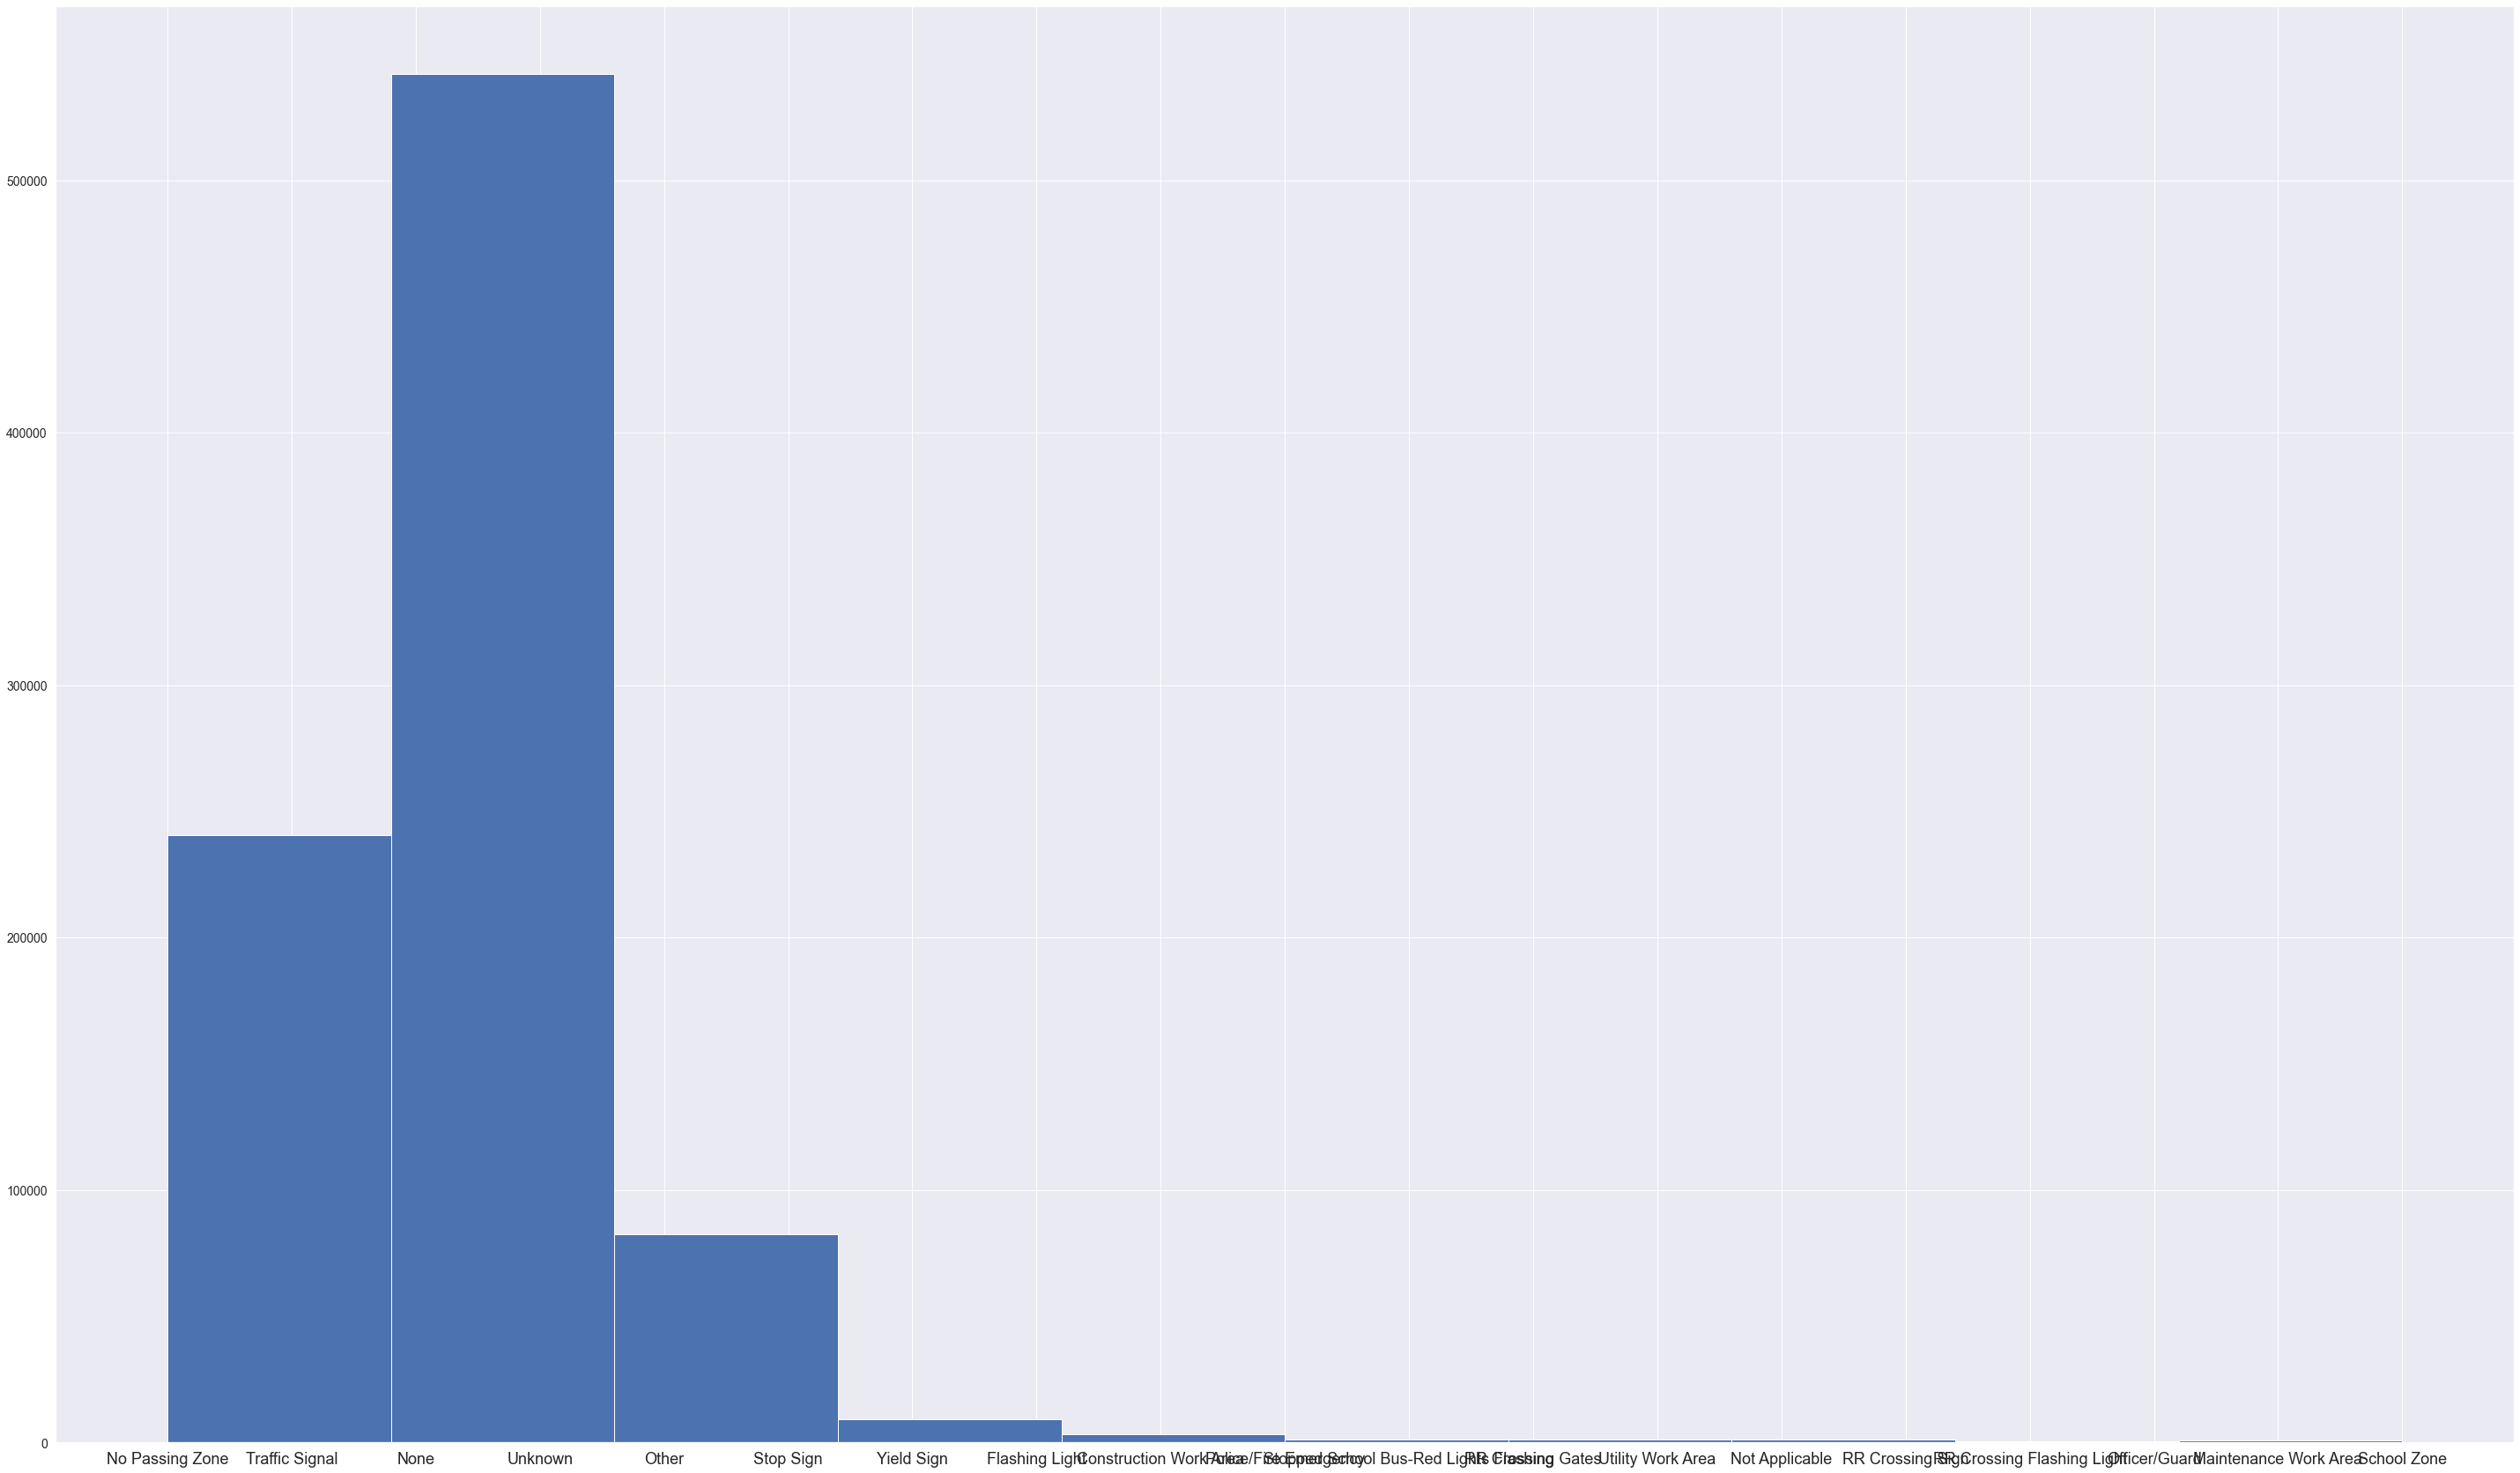

In [64]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'18',
          'ytick.labelsize':'14'}
plt.rcParams.update(params)
df['Traffic Control Device'].hist(figsize=(50, 30))

In [79]:
print(df.groupby('Traffic Control Device').count().shape)
df.groupby('Traffic Control Device').count()['Year']

(19, 12)


Traffic Control Device
Construction Work Area                      3227
Flashing Light                              2113
Maintenance Work Area                        393
No Passing Zone                            54351
None                                      469064
Not Applicable                              1040
Officer/Guard                                493
Other                                       8196
Police/Fire Emergency                        673
RR Crossing Flashing Light                    84
RR Crossing Gates                            843
RR Crossing Sign                             209
School Zone                                  375
Stop Sign                                  74172
Stopped School Bus-Red Lights Flashing       575
Traffic Signal                            186129
Unknown                                    72969
Utility Work Area                            149
Yield Sign                                  6969
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Number of Vehicles Involved'}, xlabel='Year'>

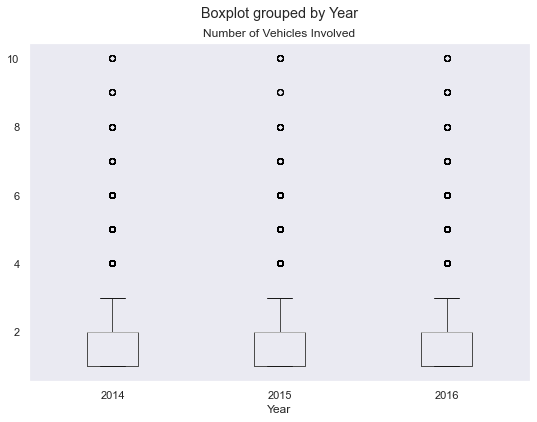

In [80]:
df.boxplot(by ='Year', column =['Number of Vehicles Involved'], grid = False)

In [81]:
data_targetless = df.drop(columns=['Number of Vehicles Involved'], axis=1)
data_targetless

,Year,Crash Descriptor,Time,Date,Lighting Conditions,Collision Type Descriptor,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,Pedestrian Bicyclist Action,Event Descriptor
87712,2014,Fatal Accident,1:24,2014-01-01,Dark-Road Unlighted,OTHER,Straight and Level,Clear,No Passing Zone,Dry,Not Applicable,"Tree, Collision With Fixed Object"
194564,2014,Property Damage & Injury Accident,1:25,2014-01-01,Dark-Road Unlighted,OTHER,Curve at Hill Crest,Clear,No Passing Zone,Wet,Not Applicable,"Tree, Collision With Fixed Object"
237937,2014,Property Damage & Injury Accident,0:50,2014-01-01,Dark-Road Lighted,REAR END,Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With"
92824,2014,Property Damage & Injury Accident,3:11,2014-01-01,Dark-Road Lighted,RIGHT ANGLE,Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With"
159622,2014,Property Damage & Injury Accident,21:57,2014-01-01,Dark-Road Lighted,LEFT TURN (3),Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With"
...,...,...,...,...,...,...,...,...,...,...,...,...
857953,2016,Property Damage Accident,0:18,2016-12-31,Dark-Road Unlighted,OTHER,Straight and Level,Clear,No Passing Zone,Wet,Not Applicable,Deer
589825,2016,Injury Accident,22:20,2016-12-31,Dark-Road Lighted,OTHER,Straight and Level,Sleet/Hail/Freezing Rain,Traffic Signal,Slush,"Crossing, With Signal","Pedestrian, Collision With"
422085,2016,Property Damage Accident,0:21,2016-12-31,Dark-Road Lighted,OTHER,Curve and Level,Snow,None,Snow/Ice,Not Applicable,"Guide Rail - Not At End, Collision With Fixed ..."
742086,2016,Property Damage Accident,14:30,2016-12-31,Daylight,REAR END,Straight and Level,Cloudy,None,Dry,Not Applicable,"Other Motor Vehicle, Collision With"


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Number of Vehicles Involved'}>]],
      dtype=object)

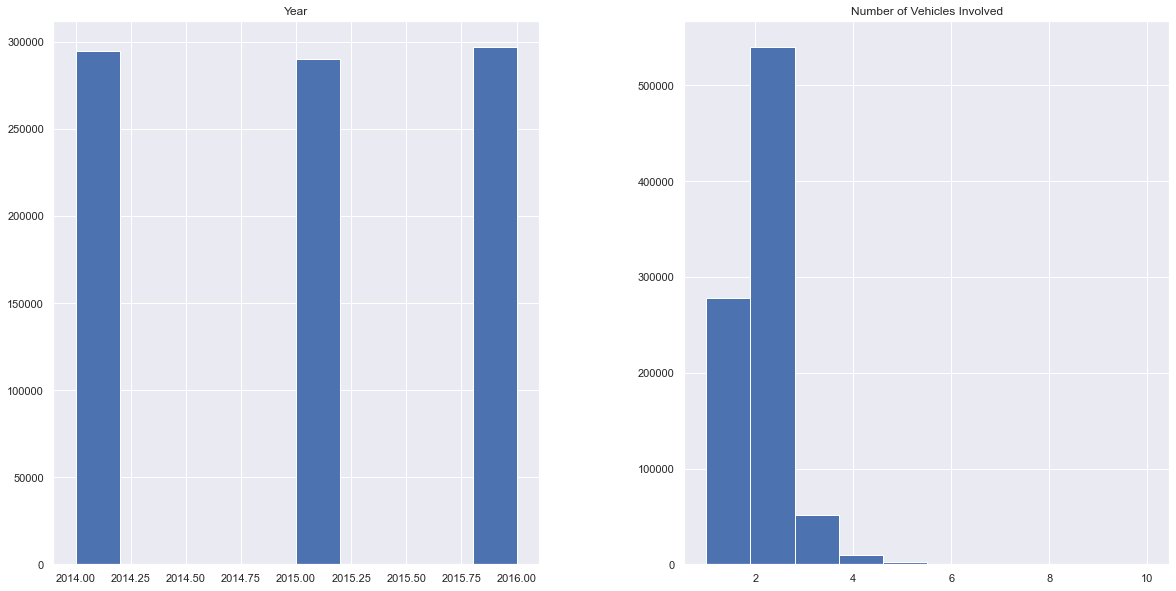

In [82]:
df.hist(figsize=(20, 10))

C:\Users\taku\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


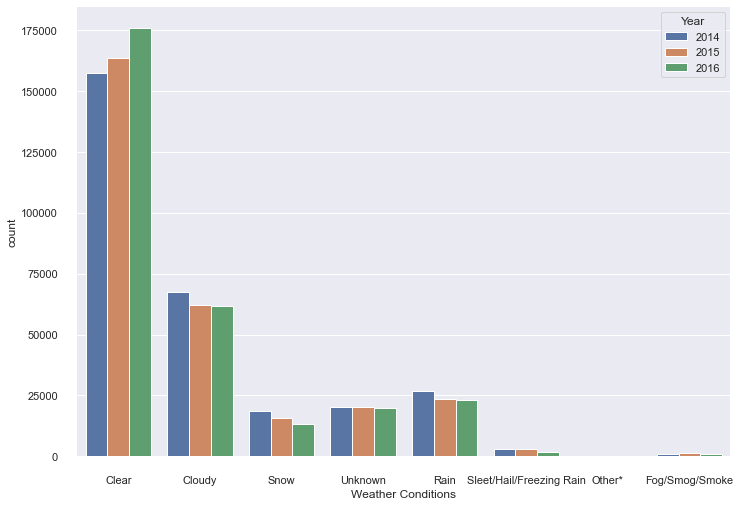

In [83]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Weather Conditions',data=df,hue = 'Year')
sns.despine(offset=10, trim=True)

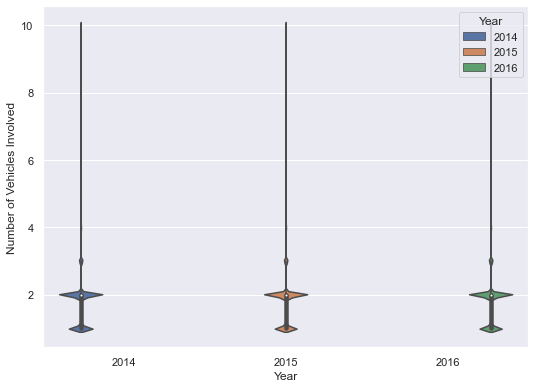

In [84]:
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(8.7,6.27)})
sns.violinplot(x="Year",y="Number of Vehicles Involved", hue="Year", data=df);
plt.show()

In [85]:
num_data=data_targetless.apply(lambda col: pd.factorize(col, sort=True)[0])
num_data

,Year,Crash Descriptor,Time,Date,Lighting Conditions,Collision Type Descriptor,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,Pedestrian Bicyclist Action,Event Descriptor
87712,0,0,684,0,1,3,4,0,3,0,7,31
194564,0,2,685,0,1,3,2,0,3,7,7,31
237937,0,2,50,0,0,5,4,0,15,0,7,20
92824,0,2,1031,0,0,6,4,0,15,0,7,20
159622,0,2,837,0,0,2,4,0,15,0,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...
857953,2,3,18,1095,1,3,4,0,3,7,7,8
589825,2,1,860,1095,0,3,4,5,15,4,3,25
422085,2,3,21,1095,0,3,1,6,4,5,7,14
742086,2,3,330,1095,3,5,4,1,4,0,7,20


In [86]:
scaler = StandardScaler()

scaled_data_array = scaler.fit_transform(num_data)

scaled_data = pd.DataFrame(data=scaled_data_array,columns=num_data.columns[0:])

scaled_data

,Year,Crash Descriptor,Time,Date,Lighting Conditions,Collision Type Descriptor,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,Pedestrian Bicyclist Action,Event Descriptor
0,-1.224077,-2.913950,0.160409,-1.720270,-1.041549,-0.678917,0.252523,-0.622906,-0.956498,-0.654876,0.043793,2.219731
1,-1.224077,-0.468871,0.162806,-1.720270,-1.041549,-0.678917,-1.354278,-0.622906,-0.956498,1.777268,0.043793,2.219731
2,-1.224077,-0.468871,-1.359477,-1.720270,-1.762116,0.246063,0.252523,-0.622906,1.272083,-0.654876,0.043793,0.298937
3,-1.224077,-0.468871,0.992271,-1.720270,-1.762116,0.708553,0.252523,-0.622906,1.272083,-0.654876,0.043793,0.298937
4,-1.224077,-0.468871,0.527195,-1.720270,-1.762116,-1.141407,0.252523,-0.622906,1.272083,-0.654876,0.043793,0.298937
...,...,...,...,...,...,...,...,...,...,...,...,...
882019,1.217177,0.753668,-1.436190,1.701998,-1.041549,-0.678917,0.252523,-0.622906,-0.956498,1.777268,0.043793,-1.796474
882020,1.217177,-1.691411,0.582333,1.701998,-1.762116,-0.678917,0.252523,1.586366,1.272083,0.734921,-2.823745,1.172025
882021,1.217177,0.753668,-1.428998,1.701998,-1.762116,-0.678917,-2.157679,2.028220,-0.770783,1.082370,0.043793,-0.748768
882022,1.217177,0.753668,-0.688234,1.701998,0.399583,0.246063,0.252523,-0.181052,-0.770783,-0.654876,0.043793,0.298937


In [87]:
scaler = MinMaxScaler()
new_data = scaler.fit_transform(scaled_data)
new_data

array([[0.        , 0.        , 0.47533009, ..., 0.        , 0.46666667,
        0.96875   ],
       [0.        , 0.66666667, 0.47602502, ..., 1.        , 0.46666667,
        0.96875   ],
       [0.        , 0.66666667, 0.03474635, ..., 0.        , 0.46666667,
        0.625     ],
       ...,
       [1.        , 1.        , 0.01459347, ..., 0.71428571, 0.46666667,
        0.4375    ],
       [1.        , 1.        , 0.22932592, ..., 0.        , 0.46666667,
        0.625     ],
       [1.        , 0.66666667, 0.1181376 , ..., 0.        , 0.46666667,
        0.625     ]])

In [88]:
df

,Year,Crash Descriptor,Time,Date,Lighting Conditions,Collision Type Descriptor,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
87712,2014,Fatal Accident,1:24,2014-01-01,Dark-Road Unlighted,OTHER,Straight and Level,Clear,No Passing Zone,Dry,Not Applicable,"Tree, Collision With Fixed Object",1
194564,2014,Property Damage & Injury Accident,1:25,2014-01-01,Dark-Road Unlighted,OTHER,Curve at Hill Crest,Clear,No Passing Zone,Wet,Not Applicable,"Tree, Collision With Fixed Object",1
237937,2014,Property Damage & Injury Accident,0:50,2014-01-01,Dark-Road Lighted,REAR END,Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2
92824,2014,Property Damage & Injury Accident,3:11,2014-01-01,Dark-Road Lighted,RIGHT ANGLE,Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2
159622,2014,Property Damage & Injury Accident,21:57,2014-01-01,Dark-Road Lighted,LEFT TURN (3),Straight and Level,Clear,Traffic Signal,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
857953,2016,Property Damage Accident,0:18,2016-12-31,Dark-Road Unlighted,OTHER,Straight and Level,Clear,No Passing Zone,Wet,Not Applicable,Deer,1
589825,2016,Injury Accident,22:20,2016-12-31,Dark-Road Lighted,OTHER,Straight and Level,Sleet/Hail/Freezing Rain,Traffic Signal,Slush,"Crossing, With Signal","Pedestrian, Collision With",1
422085,2016,Property Damage Accident,0:21,2016-12-31,Dark-Road Lighted,OTHER,Curve and Level,Snow,None,Snow/Ice,Not Applicable,"Guide Rail - Not At End, Collision With Fixed ...",1
742086,2016,Property Damage Accident,14:30,2016-12-31,Daylight,REAR END,Straight and Level,Cloudy,None,Dry,Not Applicable,"Other Motor Vehicle, Collision With",2


In [106]:
data_train, data_test, target_train, target_test = train_test_split(new_data,df['Number of Vehicles Involved'], test_size = 0.30, random_state = 10) 

In [107]:
mnb = MultinomialNB()
pred = mnb.fit(data_train, target_train).predict(data_test)

print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.615049431612045


In [108]:
data_train, data_test, target_train, target_test = train_test_split(num_data,df['Number of Vehicles Involved'], test_size = 0.30, random_state = 10) 

In [109]:
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)

print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.9496273733220462


In [99]:
pred

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [100]:
print(classification_report(target_test,pred))

C:\Users\taku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.96      0.96      0.96     83258
           2       0.99      0.98      0.98    162203
           3       0.61      0.84      0.71     15521
           4       0.09      0.02      0.03      2840
           5       0.00      0.00      0.00       546
           6       0.00      0.00      0.00       169
           7       0.00      0.00      0.00        48
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        10

    accuracy                           0.95    264608
   macro avg       0.27      0.28      0.27    264608
weighted avg       0.95      0.95      0.95    264608



In [101]:
confusion_matrix(target_test,pred)

array([[ 79674,    609,   2645,    330,      0,      0,      0,      0,
             0,      0],
       [  1131, 158486,   2537,     49,      0,      0,      0,      0,
             0,      0],
       [  1663,    609,  13064,    185,      0,      0,      0,      0,
             0,      0],
       [   311,     86,   2388,     55,      0,      0,      0,      0,
             0,      0],
       [    58,     26,    449,     13,      0,      0,      0,      0,
             0,      0],
       [    27,      4,    130,      8,      0,      0,      0,      0,
             0,      0],
       [    14,      2,     28,      4,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      8,      0,      0,      0,      0,      0,
             0,      0],
       [     1,      1,      3,      0,      0,      0,      0,      0,
             0,      0],
       [     2,      0,      7,      1,      0,      0,      0,      0,
             0,      0]], dtype=int64)

>1 mean=0.9502 se=0.000
>2 mean=0.9502 se=0.000
>3 mean=0.9502 se=0.000
>4 mean=0.9502 se=0.000
>5 mean=0.9492 se=0.001
>6 mean=0.9494 se=0.001
>7 mean=0.9495 se=0.001
>8 mean=0.9496 se=0.001
>9 mean=0.9497 se=0.001
>10 mean=0.9497 se=0.001
>11 mean=0.9498 se=0.000
>12 mean=0.9498 se=0.000
>13 mean=0.9498 se=0.000
>14 mean=0.9498 se=0.000
>15 mean=0.9499 se=0.000
>16 mean=0.9499 se=0.000
>17 mean=0.9499 se=0.000
>18 mean=0.9499 se=0.000
>19 mean=0.9499 se=0.000


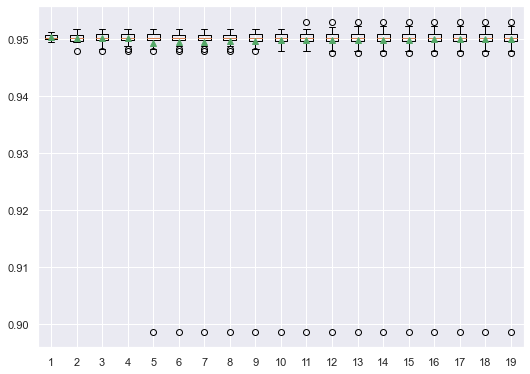

In [110]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model =  GaussianNB()
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
X = num_data
y = df['Number of Vehicles Involved']

repeats = range(1,20)
results = list()
for r in repeats:
    scores = evaluate_model(X, y, r)
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    results.append(scores)
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [103]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
df1 = df.groupby(['Date'], as_index=False)['Number of Vehicles Involved'].sum()
df1

<ipython-input-103-bb5a879dc2b4>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,Date,Number of Vehicles Involved
0,2014-01-01,938
1,2014-01-02,2550
2,2014-01-03,2191
3,2014-01-04,1434
4,2014-01-05,1188
...,...,...
1091,2016-12-27,1311
1092,2016-12-28,1213
1093,2016-12-29,1561
1094,2016-12-30,1553


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


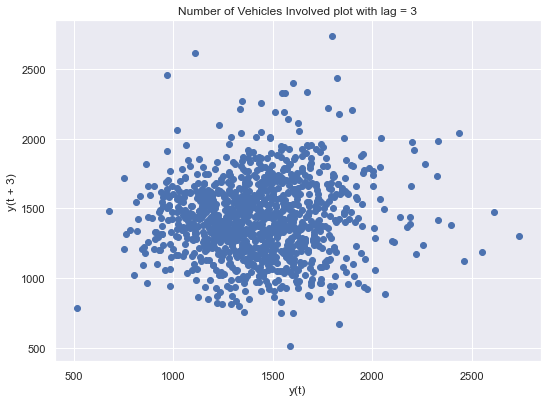

In [111]:
plt.figure()
lag_plot(df1['Number of Vehicles Involved'], lag=3)
plt.title('Number of Vehicles Involved plot with lag = 3')
plt.show()

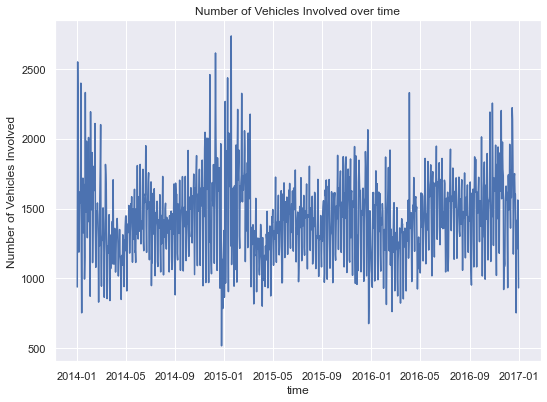

In [112]:
plt.plot(df1["Date"], df1["Number of Vehicles Involved"])
plt.title("Number of Vehicles Involved over time")
plt.xlabel("time")
plt.ylabel("Number of Vehicles Involved")
plt.show()

In [113]:
train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
training_data = train_data['Number of Vehicles Involved'].values
test_data = test_data['Number of Vehicles Involved'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data) 
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\taku\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error is 70194.80683904634


Int64Index([ 767,  768,  769,  770,  771,  772,  773,  774,  775,  776,
            ...
            1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095],
           dtype='int64', length=329)


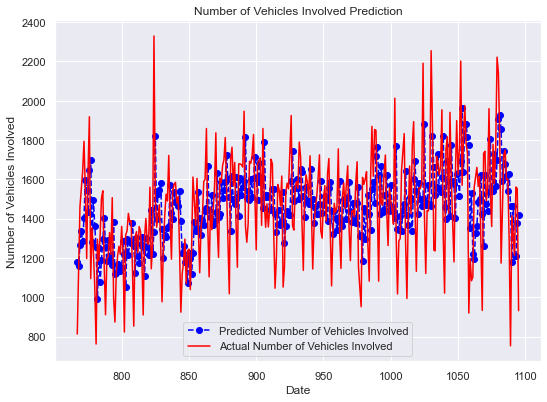

In [115]:
test_set_range = df1[int(len(df1)*0.7):].index

print(test_set_range)
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Number of Vehicles Involved')
plt.plot(test_set_range, test_data, color='red', label='Actual Number of Vehicles Involved')
plt.title('Number of Vehicles Involved Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles Involved')
# plt.xticks(np.arange(750,1100,50), df.Date[750:1100:50])
plt.legend()
plt.show()

In [52]:
output

(array([1423.13450002]),
 array([288.9965229]),
 array([[ 856.71172348, 1989.55727657]]))

In [59]:
model_predictions

[array([1185.24298349]),
 array([1154.85943224]),
 array([1265.23180995]),
 array([1335.35108695]),
 array([1278.6824112]),
 array([1405.07873896]),
 array([1591.61293165]),
 array([1542.98585159]),
 array([1435.84751444]),
 array([1640.38494557]),
 array([1694.70560975]),
 array([1271.73905783]),
 array([1495.22381737]),
 array([1358.48811229]),
 array([1258.29663127]),
 array([993.51049096]),
 array([1251.47837431]),
 array([1083.0488049]),
 array([1195.86680048]),
 array([1288.96187748]),
 array([1407.59496642]),
 array([1257.18845322]),
 array([1184.32106583]),
 array([1290.75087678]),
 array([1221.3022084]),
 array([1221.44081113]),
 array([1179.32355241]),
 array([1398.64245172]),
 array([1131.16378409]),
 array([1131.83110371]),
 array([1174.53278679]),
 array([1161.15429881]),
 array([1145.01446733]),
 array([1159.2455977]),
 array([1290.98643163]),
 array([1233.27589945]),
 array([1055.59624959]),
 array([1308.15766388]),
 array([1218.70509542]),
 array([1290.63350012]),
 arra

In [42]:
test_data

array([ 806, 1146, 1462, 1538, 1651, 1791, 1531, 1197, 1627, 1919, 1083,
       1354, 1231, 1061,  766, 1298, 1190, 1322, 1489, 1543, 1168,  904,
       1202, 1278, 1342, 1220, 1513,  999,  881, 1132, 1225, 1276, 1228,
       1364, 1231,  817, 1338, 1349, 1430, 1396, 1388, 1150,  853, 1309,
       1366, 1243, 1368, 1335, 1206,  912, 1308, 1424, 1291, 1259, 1556,
       1143, 1269, 2345, 1528, 1366, 1414, 1479, 1272,  987, 1263, 1424,
       1531, 1508, 1743, 1401, 1208, 1579, 1590, 1611, 1492, 1526, 1248,
        929, 1139, 1179, 1314, 1081, 1227, 1249, 1041, 1252, 1613, 1506,
       1371, 1616, 1345, 1136, 1362, 1421, 1602, 1619, 1864, 1364, 1099,
       1468, 1355, 1448, 1568, 1870, 1363, 1209, 1618, 1580, 1698, 1683,
       1819, 1568, 1285, 1009, 1713, 1788, 1578, 1682, 1376, 1141, 1689,
       1682, 1675, 1673, 1961, 1374, 1277, 1375, 1715, 1697, 1715, 1855,
       1544, 1243, 1682, 1691, 1726, 1369, 1883, 1508, 1354, 1479, 1366,
       1455, 1722, 1671, 1332, 1032, 1184, 1572, 15

In [43]:
N_test_observations

1129

In [ ]:
train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
training_data = train_data['Number of Vehicles Involved'].values
test_data = test_data['Number of Vehicles Involved'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data) 
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
print(model_predictions)
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(0,len(model_predictions)), model_predictions, color ="red")  
plt.show()